In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [40]:
df = pd.DataFrame({
    'Temperature': [10,12,14,16,18,20,22,24,26,28],
    'IceCream_Sales': [15,18,22,30,42,58,75,95,120,150]
})

#Look at the first few rows of the DataFrame
df.head()

,Temperature,IceCream_Sales
0,10,15
1,12,18
2,14,22
3,16,30
4,18,42


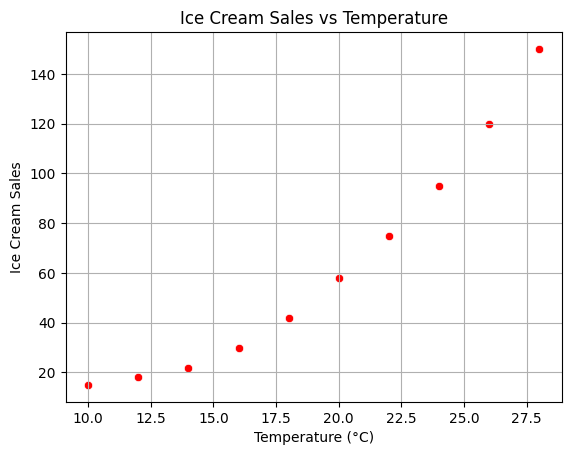

In [41]:
sns.scatterplot(data=df, x='Temperature', y='IceCream_Sales', color = 'red')
plt.title('Ice Cream Sales vs Temperature')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.show()

# Prepare the data for regression

In [42]:
# We wil use Temperature as the independent variable (X) and IceCream_Sales as the dependent variable (y)
X = df[['Temperature']]
y = df['IceCream_Sales']

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
df['Errors'] = y - y_pred

print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [7.40909091]
Intercept:  -78.27272727272728


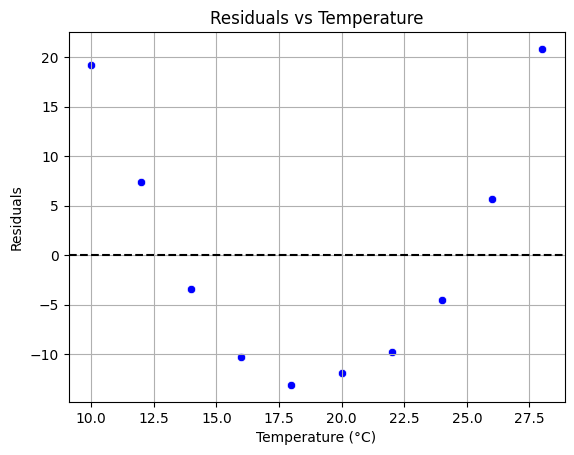

In [43]:
sns.scatterplot(data=df, x='Temperature', y='Errors', color='blue')
plt.axhline(0, color = 'black', linestyle='--')
plt.title('Residuals vs Temperature')
plt.grid(True)
plt.xlabel('Temperature (°C)')
plt.ylabel('Residuals')
plt.show()
# Errors are not randomly distributed; they show a pattern. This suggests that a linear model may not be the best fit for this data.
# As it is U shaped we might consider a polynomial regression model for better accuracy.

In [46]:
import statsmodels.formula.api as sm
df['X2'] = df['Temperature'] ** 2
df4 = df.copy()
formula_str = 'IceCream_Sales ~ Temperature + X2'
#IceCream_Sales depends on Temperature and Temperature²

result = sm.ols(formula = formula_str, data = df4).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         IceCream_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           6.12e-13
Time:                        02:35:57   Log-Likelihood:                -11.906
No. Observations:                  10   AIC:                             29.81
Df Residuals:                       7   BIC:                             30.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.5303      3.550     15.924      

In [45]:
df4

,Temperature,IceCream_Sales,Errors,X2
0,10,15,19.181818,100
1,12,18,7.363636,144
2,14,22,-3.454545,196
3,16,30,-10.272727,256
4,18,42,-13.090909,324
5,20,58,-11.909091,400
6,22,75,-9.727273,484
7,24,95,-4.545455,576
8,26,120,5.636364,676
9,28,150,20.818182,784
